In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
category_names = ['Training Data winning trade', 'Training Data losing trade',
                  'Testing Data winning trade', 'Testing Data losing trade']

In [41]:
results = {
    '':[0,0,0,0],
    'XGBoost':[359,59,70,40],
    'Linear':[80,34,22,12],
    'Neural Network MSE Loss function':[243,120,76,25],
    'Neural Network Custom Loss function':[268,115,70,38],
    'Emsemble Neural Network':[279,130,68,27]
         }

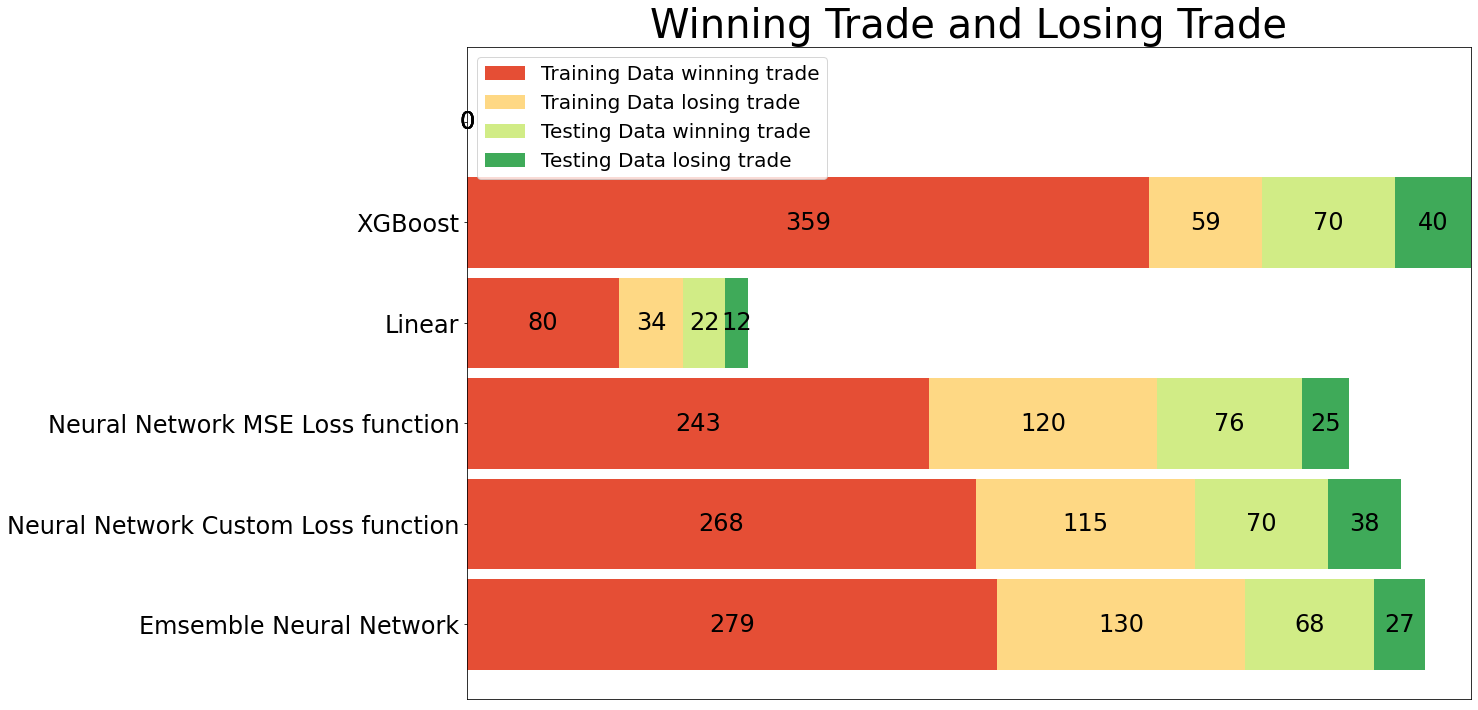

In [46]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(18, 12))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title('Winning Trade and Losing Trade',fontsize = 40)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.9,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.rcParams['font.size']='24'
plt.legend(loc =2,prop={'size':20})
plt.show()
